In [1]:
# EDA pamages 
import pandas as pd

#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Amazon_Unlocked_Mobile.csv\Amazon_Unlocked_Mobile.csv")

# Dataset

In [3]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


# Replace null values

In [5]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [6]:
df[df['Price'].isnull()]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
1544,90's Teenage Business Mobile Telephone Costume...,NaN,NaN,5,"I didnt end up using it, but its cute and im s...",0.0
1545,90's Teenage Business Mobile Telephone Costume...,NaN,NaN,5,"Fast, simple and easy.",0.0
1546,90's Teenage Business Mobile Telephone Costume...,NaN,NaN,5,Hilarious. Worked great for Zack Morris Hallow...,0.0
1547,90's Teenage Business Mobile Telephone Costume...,NaN,NaN,5,Perfect for a Zack Morris costume! Everyone lo...,1.0
1548,90's Teenage Business Mobile Telephone Costume...,NaN,NaN,4,It was awesome and fun,0.0
...,...,...,...,...,...,...
404007,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,1,"Don't buy it....The phone is damaged, Imei Nul...",0.0
404008,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,1,Korean phone can change to English but still s...,0.0
404009,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,3,it doesn't came unlocked! I had to many proble...,0.0
404010,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,3,it's not working to Movistar venezuela,1.0


In [7]:
df['Brand Name'].mode()

0    Samsung
Name: Brand Name, dtype: object

In [8]:
df['Brand Name'].fillna('Samsung',inplace=True)

In [9]:
temp = df['Review Votes'][df['Brand Name'] == 'Samsung'] # where the Brand Name is Sumsung put the Review_votes is 0.0
temp.mode()

0    0.0
Name: Review Votes, dtype: float64

In [10]:
df['Review Votes'].fillna(0.0,inplace=True)

In [11]:
temp1 = df['Reviews'][df['Brand Name'] == 'Samsung'] 
temp1.mode()

0    Good
Name: Reviews, dtype: object

In [12]:
df['Reviews'].fillna('Excellent',inplace=True)

In [13]:
df['Price'].mode()

0    99.99
Name: Price, dtype: float64

In [14]:
df["Price"].fillna(99.99,inplace=True)

In [15]:
df.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

# Conversion of dtpyes

In [16]:
def get_convert_dtype(list_of_c_ids):
    for list_of_c_id in list_of_c_ids:
        df[list_of_c_id] = df[list_of_c_id].apply(pd.to_numeric)
        # convert just columns "a" and "b" df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
        df[list_of_c_id] = df[list_of_c_id].astype(int)
get_convert_dtype(['Review Votes','Price','Rating'])

In [17]:
df.dtypes

Product Name    object
Brand Name      object
Price            int32
Rating           int32
Reviews         object
Review Votes     int32
dtype: object

In [18]:
df[df['Rating']!=3]
df['Positive Rated'] = np.where(df["Rating"]>3,1,0)

In [19]:
df['Rating'].unique()

array([5, 4, 1, 2, 3])

In [20]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positive Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,5,I feel so LUCKY to have found this used (phone...,1,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,4,"nice phone, nice up grade from my pantach revu...",0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,5,Very pleased,0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,4,It works good but it goes slow sometimes but i...,0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,4,Great phone to replace my lost phone. The only...,0,1
...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,5,another great deal great price,0,1
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,3,Ok,0,0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,5,Passes every drop test onto porcelain tile!,0,1
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,3,I returned it because it did not meet my needs...,0,0


# Outliers

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,413840.0,224.397584,271.558465,1.0,79.0,139.0,269.0,2598.0
Rating,413840.0,3.819578,1.548216,1.0,3.0,5.0,5.0,5.0
Review Votes,413840.0,1.462454,9.030315,0.0,0.0,0.0,1.0,645.0
Positive Rated,413840.0,0.688665,0.463040,0.0,0.0,1.0,1.0,1.0


In [57]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(2,2,1)
        #histogram
        sns.distplot(df[list_var])
        plt.subplot(2,2,2)
        sns.boxplot(df[list_var])

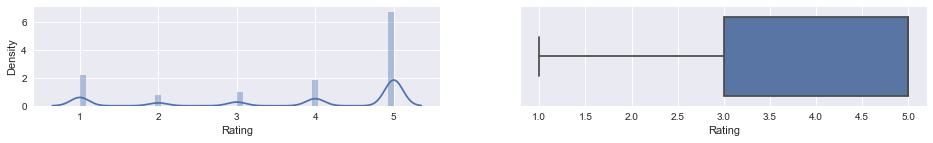

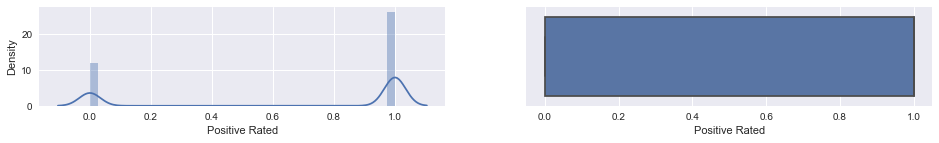

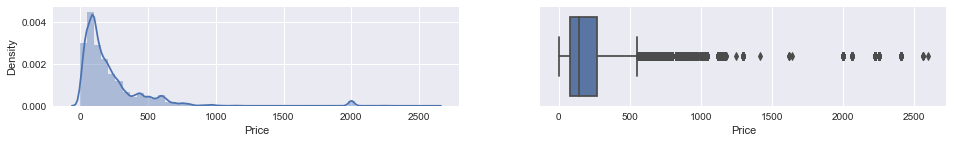

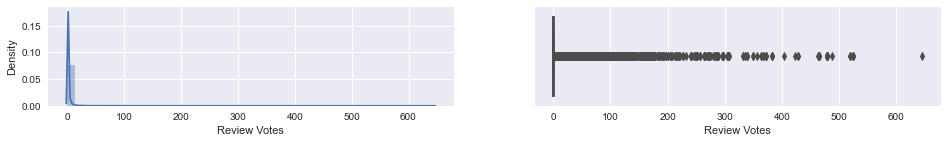

In [58]:
plotvariable(df,["Rating","Positive Rated","Price","Review Votes"])

##### IQR

In [24]:
#it is gerenally use when data is skewed
Iqr_dic = {}
def get_outliers(data_f, list_fts):
    for list_ft in list_fts:
        Q1_25per = df[list_ft].quantile(0.25)
        Q3_75per = df[list_ft].quantile(0.75)
        IQR = Q3_75per - Q1_25per
        
        global lowwer_bound, upper_bound
        
        lowwer_bound = Q1_25per - 1.5 * IQR
        upper_bound = Q3_75per + 1.5 * IQR
        Iqr_dic[list_ft] = [Q1_25per, Q3_75per, IQR, lowwer_bound, upper_bound]
    #return Iqr_dic#,Q1_25per, Q3_75per, IQR,lowwer_bound,upper_bound

In [25]:
get_outliers(df,["Review Votes"])

In [26]:
get_outliers(df,["Price"])

In [27]:
Iqr_dic

{'Review Votes': [0.0, 1.0, 1.0, -1.5, 2.5],
 'Price': [79.0, 269.0, 190.0, -206.0, 554.0]}

###### Trimming

In [28]:
rv = df[(df['Review Votes'] > upper_bound)]

In [29]:
p = df[(df['Price'] > upper_bound)]

###### Capping

In [30]:
#capping
new_df = df.copy()

In [31]:
new_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positive Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,5,I feel so LUCKY to have found this used (phone...,1,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,4,"nice phone, nice up grade from my pantach revu...",0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,5,Very pleased,0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,4,It works good but it goes slow sometimes but i...,0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199,4,Great phone to replace my lost phone. The only...,0,1
...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,5,another great deal great price,0,1
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,3,Ok,0,0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,5,Passes every drop test onto porcelain tile!,0,1
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79,3,I returned it because it did not meet my needs...,0,0


In [32]:
def get_capping(c_names):
    for c_name in c_names:
        new_df[c_name] = np.where(new_df[c_name] > upper_bound,
                                  upper_bound,
                                  np.where(new_df[c_name] < lowwer_bound,
                                           lowwer_bound,
                                           new_df[c_name]
                                          )
                                 )

In [33]:
def plotvariable2(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(2,2,1)
        #histogram
        sns.distplot(new_df[list_var])
        plt.subplot(2,2,2)
        sns.boxplot(new_df[list_var])

In [34]:
get_capping(['Price'])

In [35]:
get_capping(['Review Votes'])

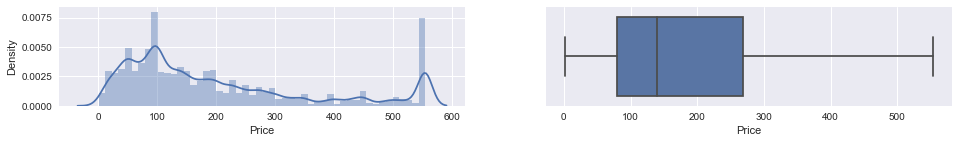

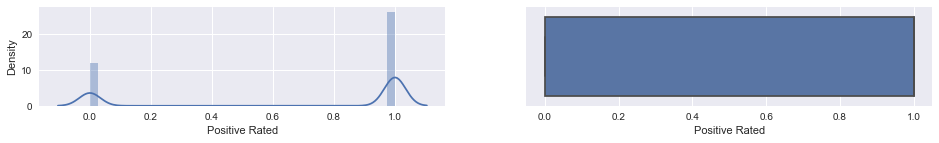

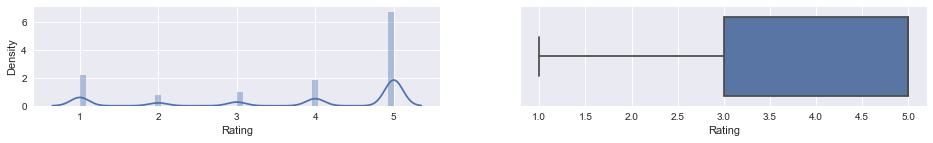

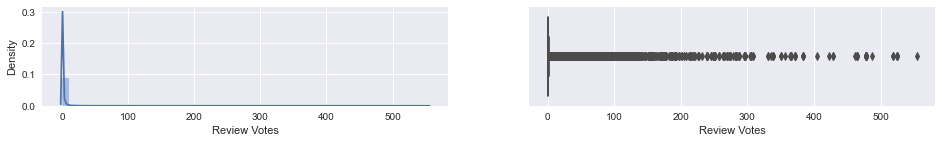

In [36]:
plotvariable2(new_df,['Price',"Positive Rated",'Rating','Review Votes'])

# Visualization

Text(0.5, 1.0, 'Positive Rating')

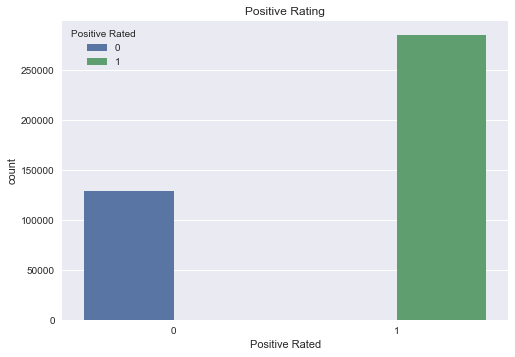

In [38]:
sns.countplot(x='Positive Rated',hue = 'Positive Rated' ,data=df)
plt.title("Positive Rating")

In [39]:
new_df['Brand Name'].value_counts()[:10]

Samsung       130918
BLU            63248
Apple          58186
LG             22417
BlackBerry     16872
Nokia          16806
Motorola       13417
HTC            12724
CNPGD          12613
OtterBox        7989
Name: Brand Name, dtype: int64

Text(0.5, 1.0, 'Brand Name')

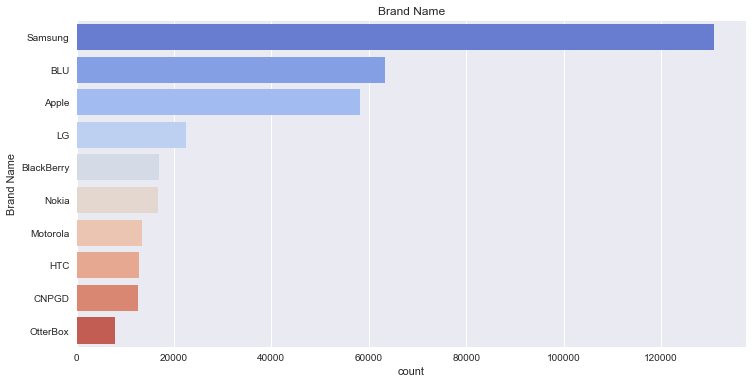

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(y='Brand Name',order=new_df['Brand Name'].value_counts().index[:10],data=df,palette='coolwarm')
plt.title("Brand Name")
#it is combine graph shows high rate of TV and movie shows was given by (US)

In [94]:
import plotly.express as px
values = new_df['Rating'].value_counts()
ids = new_df['Rating'].unique().tolist()
fig = px.pie(df, values = values, names = ids, title = 'Rating')
fig.show()

<AxesSubplot:xlabel='Price', ylabel='count'>

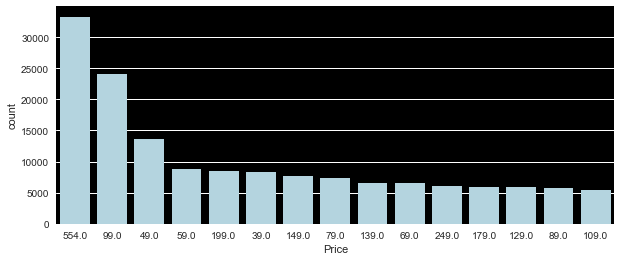

In [42]:
plt.figure(figsize=(10,4))
ax = plt.axes()
ax.set_facecolor('black')
sns.countplot(x='Price',order=new_df['Price'].value_counts().index[:15],data = new_df,color='lightblue')

In [43]:
bn = new_df["Brand Name"].value_counts().index[:10]

In [44]:
pr = new_df["Price"].value_counts().index[:10]

<AxesSubplot:>

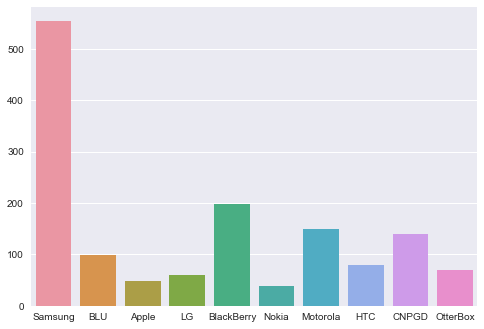

In [45]:
sns.barplot(x=bn, y=pr)

In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Product Name    413840 non-null  object 
 1   Brand Name      413840 non-null  object 
 2   Price           413840 non-null  float64
 3   Rating          413840 non-null  int32  
 4   Reviews         413840 non-null  object 
 5   Review Votes    413840 non-null  float64
 6   Positive Rated  413840 non-null  int32  
dtypes: float64(2), int32(2), object(3)
memory usage: 18.9+ MB


# Model

In [60]:
new_df[["Reviews","Positive Rated"]]

,Reviews,Positive Rated
0,I feel so LUCKY to have found this used (phone...,1
1,"nice phone, nice up grade from my pantach revu...",1
2,Very pleased,1
3,It works good but it goes slow sometimes but i...,1
4,Great phone to replace my lost phone. The only...,1
...,...,...
413835,another great deal great price,1
413836,Ok,0
413837,Passes every drop test onto porcelain tile!,1
413838,I returned it because it did not meet my needs...,0


In [60]:
"""Train test split is a model validation process that allows you to simulate how your model would perform with new data"""
from sklearn.model_selection import train_test_split

In [61]:
"""Split the data set into two pieces — a training set and a testing set.This consists of random sampling without replacement
about 75 percent of the rows (you can vary this) and putting them into your training set. The remaining 25 percent is put
into your test set.Note that the colors in “Features” and “Target” indicate where their data will go
(“X_train,” “X_test,” “y_train,” “y_test”) for a particular train test split."""
X_train, X_test, y_train, y_test = train_test_split(new_df['Reviews'], new_df['Positive Rated'], random_state = 0)

In [62]:
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


X_train shape:  (310380,)


###### CountVectorizer

In [63]:
"""(Countvectorizer) is a method to convert text to numerical data.Convert a collection of text documents to a (matrix[0,1] 
of token counts)"""
from sklearn.feature_extraction.text import CountVectorizer
"""The (sklearn.feature_extraction) module can be used to extractfeatures in a format supported by machine learning 
algorithms from datasets consisting of formats such as (text and image)."""
vect = CountVectorizer().fit(X_train)
vect.get_feature_names()[::3000]

['00',
 '6h',
 'andoff',
 'benefits',
 'cellphon',
 'cornfield',
 'direcciones',
 'esqe',
 'freckles',
 'hcb35',
 'inundated',
 'locator',
 'moveing',
 'organizers',
 'portability',
 'receipes',
 'sandly',
 'softwer',
 'tasklist',
 'unaudible',
 'weirdos']

In [64]:
len(vect.get_feature_names())

62128

##### transform

In [65]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<310380x62128 sparse matrix of type '<class 'numpy.int64'>'
	with 8435807 stored elements in Compressed Sparse Row format>

##### LogisticRegression

In [67]:
"""linear_model is a class of the sklearn module if contain different functions for performing machine learning with linear
models.The term linear model implies that the model is specified as a linear combination of features. Based on training data,
the learning process computes one weight for each feature to form a model thatcan predict or estimate the target value."""
from sklearn.linear_model import LogisticRegression
"""Logistic regression is the most widely used machine learning algorithm for classification problems.Logistic regression 
is a statistical method used to predict the outcome of a dependent variable based on previous observations.It's a type of 
regression analysis and is a commonly used algorithm for solving binary classification problems."""
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

##### Accuracy

In [68]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8862773768176058


In [69]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())
feature_names

array(['00', '000', '0000', ..., '위해', '한국에서', 'ｎｏｋｉａ'], dtype='<U156')

In [70]:
# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort() # it just sort all coef from 0 to last one 
sorted_coef_index

array([60994,  7807, 15408, ..., 21708, 21509, 21508], dtype=int64)

In [71]:
# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['worst' 'awful' 'crashes' 'garbage' 'false' 'disappointing' 'crashed'
 'unusable' 'empty' 'worthless']

Largest Coefs: 
['excelent' 'excelente' 'exelente' 'loving' 'perfecto' 'excellent'
 'superb' 'exelent' 'awesome' 'worried']



##### Tfidf

In [72]:
"""The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms
from datasets consisting of formats such as text and image.Note Feature extraction is very different from Feature selection:
the former consists in transforming arbitrary data,
such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique
applied on these"""
from sklearn.feature_extraction.text import TfidfVectorizer
"""The TfidfVectorizer is a class in the sklearn library. It calculates tf-idf values(term frequency-inverse document
frequency)for each string in a corpus, or set of documents.The TfidfVectorizer works by chopping up the text into individual 
words and counting how many timeseach word occurs in each document. Then it takes that number and divides it by the total
number of words that occur in all of the documents combined—so if there are 100 words in one document and 500 words in
another,then if “word A” occurs twice in one and five times in another, word A’s tf value would be 2/100=0.02 and 5/500=0.1 
respectively.Then it will take these two numbers (tf) and multiply them by an inverse document count multiplier (idf),which
means that words that occur frequently overall but not frequently within single documents will be downweighted relative to 
extremely rare words with high frequencies within single documents."""

'The TfidfVectorizer is a class in the sklearn library. It calculates tf-idf values(term frequency-inverse document\nfrequency)for each string in a corpus, or set of documents.The TfidfVectorizer works by chopping up the text into individual \nwords and counting how many timeseach word occurs in each document. Then it takes that number and divides it by the total\nnumber of words that occur in all of the documents combined—so if there are 100 words in one document and 500 words in\nanother,then if “word A” occurs twice in one and five times in another, word A’s tf value would be 2/100=0.02 and 5/500=0.1 \nrespectively.Then it will take these two numbers (tf) and multiply them by an inverse document count multiplier (idf),which\nmeans that words that occur frequently overall but not frequently within single documents will be downweighted relative to \nextremely rare words with high frequencies within single documents.'

In [73]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

21129

In [76]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<310380x21129 sparse matrix of type '<class 'numpy.float64'>'
	with 8363789 stored elements in Compressed Sparse Row format>

In [77]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9010285873463902


In [78]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest Tfidf: 
['warmness' 'pthalo' 'commenter' 'storageso' 'aggregration' 'seizing'
 '___thank' '___update' 'a10' 'resins']

Largest Tfidf: 
['fantástico' 'awesomeeee' 'flimsy' 'useful' 'marvelous' 'damaged'
 'damage' 'thanks' 'thankyou' 'thanx']



In [79]:
sorted_coef_index = model.coef_[0].argsort()
print('Smallest coef: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest coef: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest coef: 
['not' 'worst' 'disappointed' 'poor' 'waste' 'returning' 'useless'
 'terrible' 'return' 'horrible']

Largest coef: 
['love' 'great' 'perfect' 'excellent' 'amazing' 'loves' 'best' 'awesome'
 'perfectly' 'easy']



In [80]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['Not an issue, phone is working','an issue, phone is not working'])))

[0 0]


In [81]:
# n-grams
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
# min_df is used for removing terms that appear too infrequently.
# min_df = 5 means "ignore terms that appear in less than 5 documents"
"""TfidfVectorizer has an ngram_range parameter to determin the range of n-grams 
you want in the final matrix as new features. In your case, you want (1,2) to go from unigrams to bigrams:"""
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

256350

In [90]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9348119337335069


In [91]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['not happy' 'not satisfied' 'no good' 'worst' 'junk' 'not worth'
 'garbage' 'awful' 'at best' 'not great']

Largest Coef: 
['excelent' 'excelente' 'exelente' 'no issues' 'perfecto' 'loving'
 'exelent' 'excellent' 'awesome' 'no problem']



In [92]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                   'an issue, phone is not working'])))

[0 0]
